HW3
==

Siyi Wu

sxw8121@mavs.uta.edu

In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
import platform
import psutil

## Merge sort

In [12]:
def merge_sort(arr):
    """Divide"""
    if len(arr) == 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    return marge(merge_sort(left), merge_sort(right))


def marge(left, right):
    """Conquer"""
    result = []
    # Still numbers in both arrays.
    while len(left) > 0 and len(right) > 0:
        # Add the smallest number from each array to the result array.
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    # If one of the arrays is empty, add the remaining array.
    result.extend(left)
    result.extend(right)
    return result

## Test

In [13]:
def benchmark_sorting_algorithms():
    sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
    algorithms = [merge_sort]
    results = {alg.__name__: [] for alg in algorithms}

    for size in sizes:
        test_array = np.random.randint(0, 10000, size)
        for alg in algorithms:
            arr_copy = test_array.copy()
            start_time = time.time()
            alg(arr_copy)
            end_time = time.time()
            results[alg.__name__].append(end_time - start_time)

    # Plot results
    for alg_name, runtimes in results.items():
        plt.plot(sizes, runtimes, label=alg_name)

    plt.xlabel("Input Size (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title("Sorting Algorithm Benchmark")
    plt.legend()
    plt.show()

    # System information
    print("System Information:")
    print(f"CPU: {platform.processor()}")
    print(f"RAM: {psutil.virtual_memory().total / 1e9:.2f} GB")
    print(f"Python Version: {platform.python_version()}")

    return sizes, results


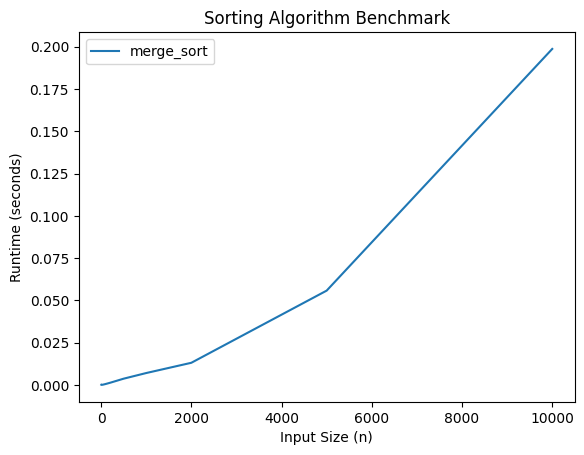

System Information:
CPU: x86_64
RAM: 13.61 GB
Python Version: 3.11.11
Runtime for merge_sort:
  Input size 5: 0.000165 seconds
  Input size 10: 0.000076 seconds
  Input size 20: 0.000137 seconds
  Input size 50: 0.000286 seconds
  Input size 100: 0.000614 seconds
  Input size 200: 0.001358 seconds
  Input size 500: 0.003769 seconds
  Input size 1000: 0.007100 seconds
  Input size 2000: 0.013159 seconds
  Input size 5000: 0.055810 seconds
  Input size 10000: 0.198651 seconds


In [14]:
sizes, results = benchmark_sorting_algorithms()

for alg_name, runtimes in results.items():
    print(f"Runtime for {alg_name}:")
    for size, runtime in zip(sizes, runtimes):
        print(f"  Input size {size}: {runtime:.6f} seconds")